# DAT 301 - Assignment 5: CNN (2 of 5)
- Name: Colin Bowers (bowerc3)
- Date: Mar 20, 2024

## Experiment #1
Adding a third convolutional layer.

**Note**: Changes from the original notebook are shown in <font color="red">red</font>.

# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

2024-03-11 11:17:08.303030: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 11:17:08.358271: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 11:17:08.358339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 11:17:08.359910: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 11:17:08.368045: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 11:17:08.369223: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### <font color="red">Add a third convolutional layer</font>

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Model Summary

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
%%time
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
  1/250 [..............................] - ETA: 4:54 - loss: 0.6981 - accuracy: 0.5312

2024-03-11 11:17:13.484271: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15745024 exceeds 10% of free system memory.
2024-03-11 11:17:13.526145: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23721984 exceeds 10% of free system memory.
2024-03-11 11:17:13.526429: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23721984 exceeds 10% of free system memory.
2024-03-11 11:17:13.533526: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28096128 exceeds 10% of free system memory.
2024-03-11 11:17:13.533654: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28096128 exceeds 10% of free system memory.


250/250 [==============================] - 35s 137ms/step - loss: 0.6720 - accuracy: 0.5834 - val_loss: 0.6329 - val_accuracy: 0.6865
Epoch 2/25
250/250 [==============================] - 30s 120ms/step - loss: 0.6080 - accuracy: 0.6719 - val_loss: 0.5499 - val_accuracy: 0.7335
Epoch 3/25
250/250 [==============================] - 28s 111ms/step - loss: 0.5505 - accuracy: 0.7166 - val_loss: 0.5223 - val_accuracy: 0.7555
Epoch 4/25
250/250 [==============================] - 27s 109ms/step - loss: 0.5188 - accuracy: 0.7366 - val_loss: 0.4841 - val_accuracy: 0.7735
Epoch 5/25
250/250 [==============================] - 35s 141ms/step - loss: 0.4867 - accuracy: 0.7596 - val_loss: 0.4602 - val_accuracy: 0.7860
Epoch 6/25
250/250 [==============================] - 27s 107ms/step - loss: 0.4838 - accuracy: 0.7663 - val_loss: 0.4546 - val_accuracy: 0.7830
Epoch 7/25
250/250 [==============================] - 27s 108ms/step - loss: 0.4587 - accuracy: 0.7765 - val_loss: 0.4484 - val_accuracy: 0.7

### Evaluate the Model

63/63 - 3s - loss: 0.4131 - accuracy: 0.8390 - 3s/epoch - 41ms/step


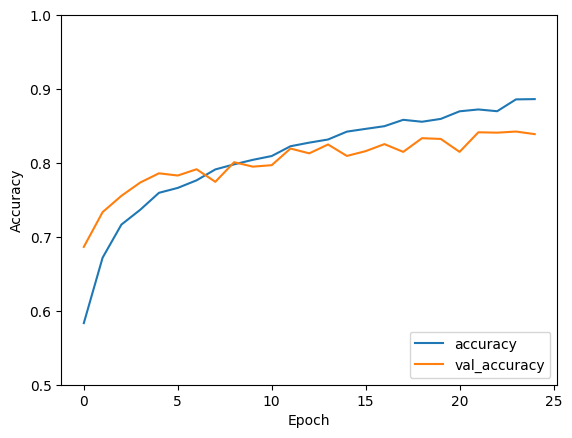

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(test_set, verbose=2)

In [17]:
print(f"Accuracy: {test_acc}")
print(f"    Loss: {test_loss}")

Accuracy: 0.8389999866485596
    Loss: 0.4130960702896118


In [18]:
original_acc = 0.7954999804496765
delta_acc = test_acc - original_acc
print(f"Increase in Accuracy: {delta_acc}")

Increase in Accuracy: 0.04350000619888306


In [31]:
print("SUMMARY")
print(f"Accuracy (%): {round(test_acc*100, 3)}")
print(f"Increase (%): {round(delta_acc*100, 3)}")

SUMMARY
Accuracy (%): 83.9
Increase (%): 4.35
